In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
my_path = '/content/gdrive/My Drive/Data-Science-Google-Colab/'

In [ ]:
cd $my_path

/content/gdrive/My Drive/Data-Science-Google-Colab


In [ ]:
cd time-series-forecasting

/content/gdrive/My Drive/Data-Science-Google-Colab/time-series-forecasting


In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
cd demand-forecast/

/content/gdrive/My Drive/Data-Science-Google-Colab/time-series-forecasting/demand-forecast


In [ ]:
ls

catboost_info/                sample_submission_hSlSoT6.csv  train_GzS76OK.zip
demand-forecasting-sub.csv    test.csv
food-demand-forecast-rfr.csv  train/


In [ ]:
ls train

fulfilment_center_info.csv  meal_info.csv  train.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
train_df = pd.read_csv('train/train.csv')
fulfilment_center_info_df = pd.read_csv('train/fulfilment_center_info.csv')
meal_info_df = pd.read_csv('train/meal_info.csv')

test_df = pd.read_csv('test.csv')

In [ ]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [ ]:
meal_info_df

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [ ]:
train_df['month'] = (train_df['week'].floordiv(4.3)).mod(12).add(1)
train_df['year'] = (train_df['week'].floordiv(52.14)).add(1)

test_df['month'] = (test_df['week'].floordiv(4.3)).mod(12).add(1)
test_df['year'] = (test_df['week'].floordiv(52.14)).add(1)

In [ ]:
df=pd.merge(train_df, fulfilment_center_info_df, on='center_id')
df=pd.merge(df, meal_info_df, on='meal_id')

In [ ]:
test_df = pd.merge(test_df, fulfilment_center_info_df, on='center_id')
test_df = pd.merge(test_df, meal_info_df, on='meal_id')

In [ ]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,month,year,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,1,1,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,1,1,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,1,1,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,1,1,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,2,1,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,9,3,473,77,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,10,3,473,77,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,10,3,473,77,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,10,3,473,77,TYPE_A,4.5,Fish,Continental


In [ ]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,month,year,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,6.270565,1.955188,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,3.320203,0.795073,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,1.000000,1.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,3.000000,1.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,6.000000,2.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,9.000000,3.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,12.000000,3.000000,713.000000,93.000000,7.000000


1. Count in every column is same i.e., there are no null values
2. mean value in num_orders is 216 where as max value is 24299 which is way larger which could mean that it is an outlier.

Let us visualize data to get more insights.

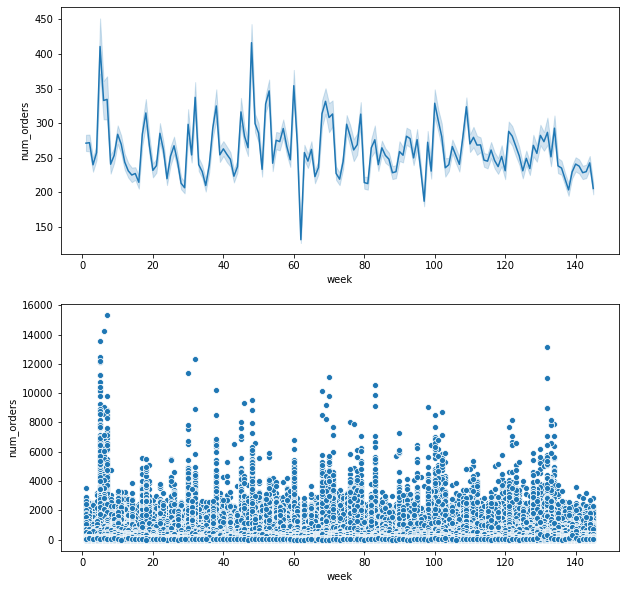

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10,10))
sns.lineplot(data=df, x='week', y='num_orders', ax=ax[0])
sns.scatterplot(data=df, x='week', y='num_orders', ax=ax[1])

Let us remove that outlier

In [ ]:
df = df.drop(df[df.num_orders>20000].index, axis=0)

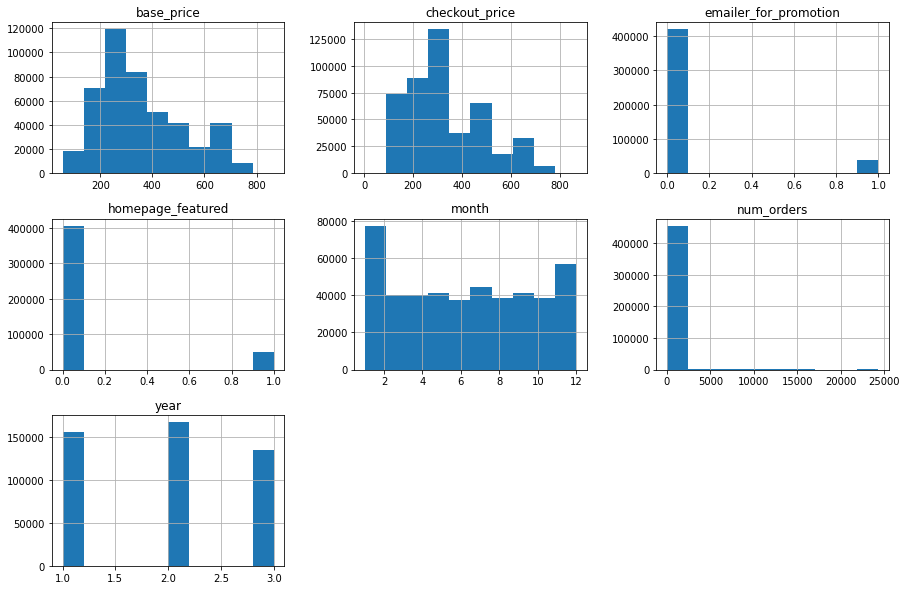

In [ ]:
h = train_df[train_df.columns[4:]].hist(figsize=(15,10))

Our target variable data is skewed. Let us apply some transforms.

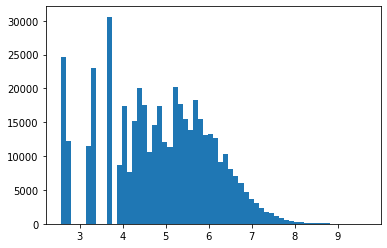

In [ ]:
h = plt.hist(np.log(df.num_orders), bins=60)

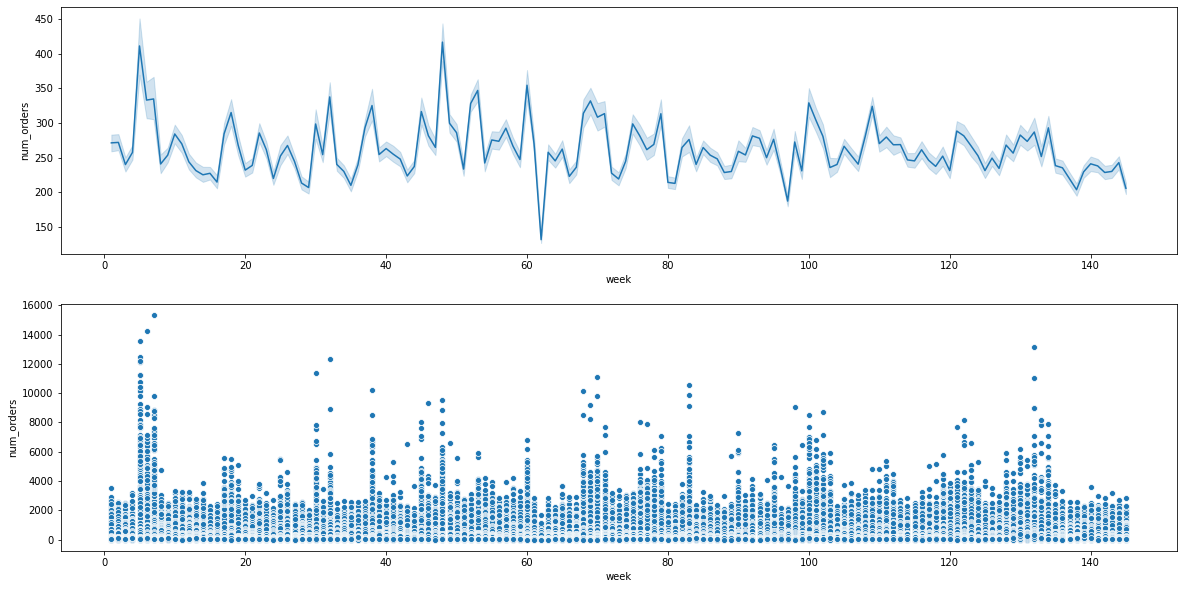

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
sns.lineplot(df['week'], df['num_orders'], ax=ax[0])
sns.scatterplot(df['week'], df['num_orders'], ax=ax[1])

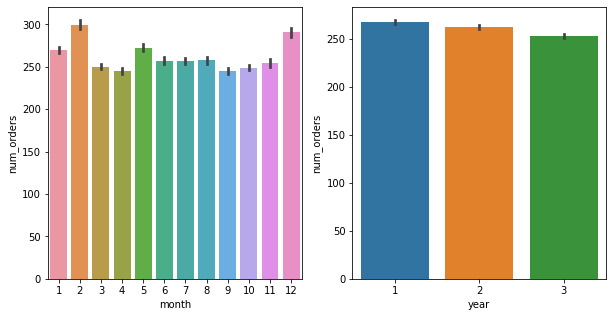

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.barplot(df['month'], df['num_orders'], ax=ax[0])
sns.barplot(df['year'], df['num_orders'], ax=ax[1])

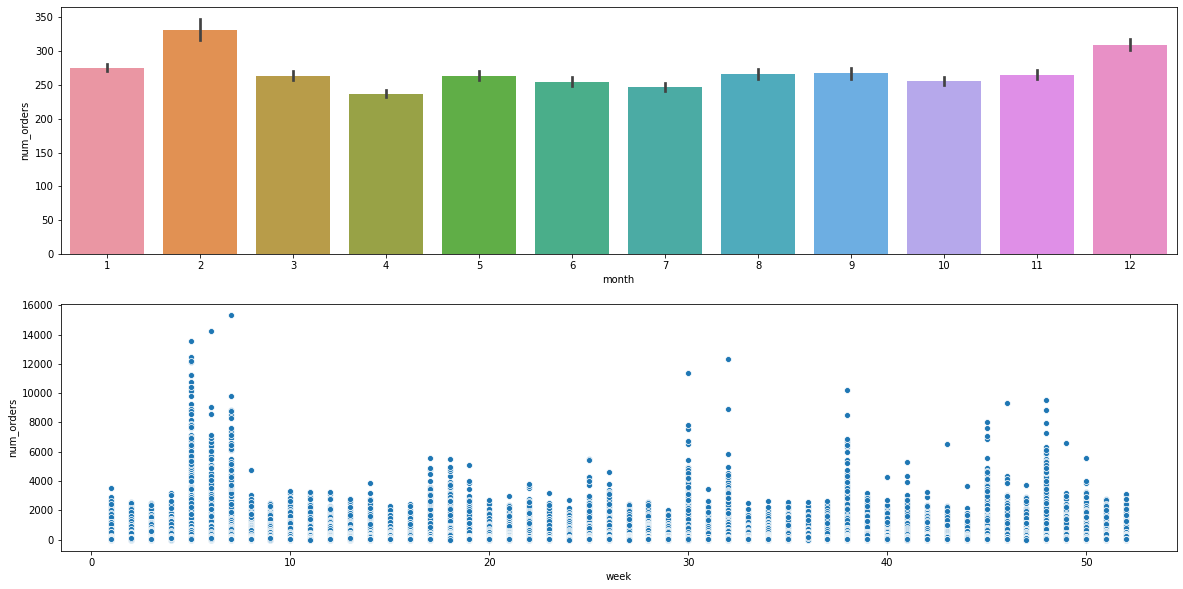

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))

sns.barplot(data = df[df.year==1], x='month', y='num_orders', ax=ax[0])
sns.scatterplot(data = df[df.year==1], x='week', y='num_orders', ax=ax[1])

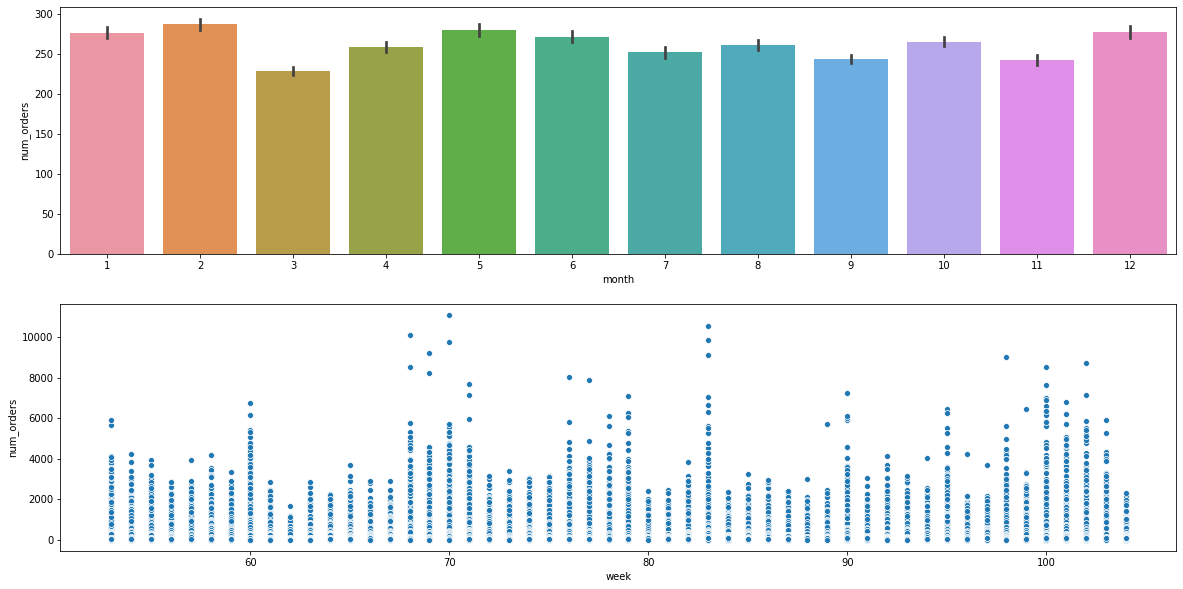

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))

sns.barplot(data = df[df.year==2], x='month', y='num_orders', ax=ax[0])
sns.scatterplot(data = df[df.year==2], x='week', y='num_orders', ax=ax[1])

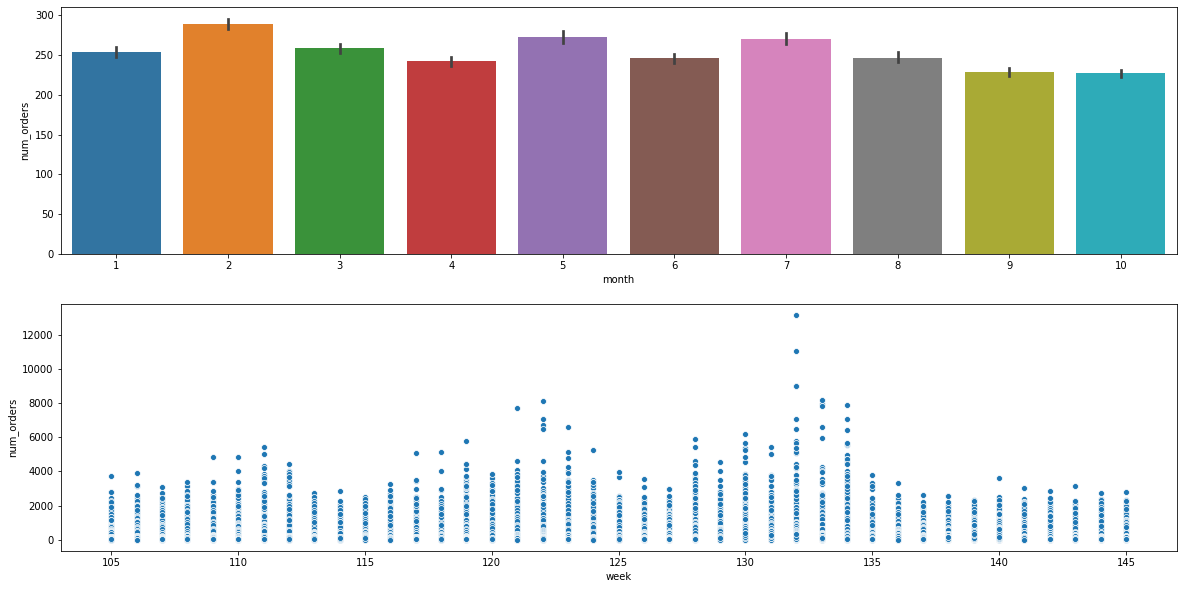

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))

sns.barplot(data = df[df.year==3], x='month', y='num_orders', ax=ax[0])
sns.scatterplot(data = df[df.year==3], x='week', y='num_orders', ax=ax[1])

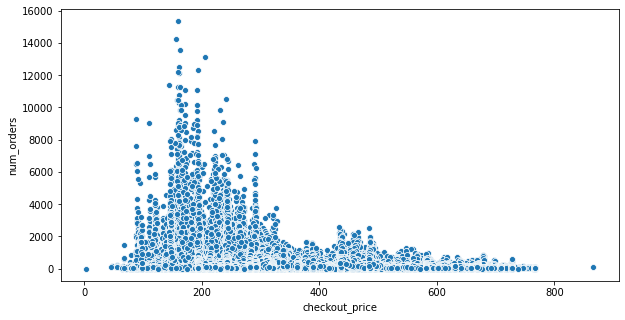

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=df, x='checkout_price', y=(df.num_orders))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

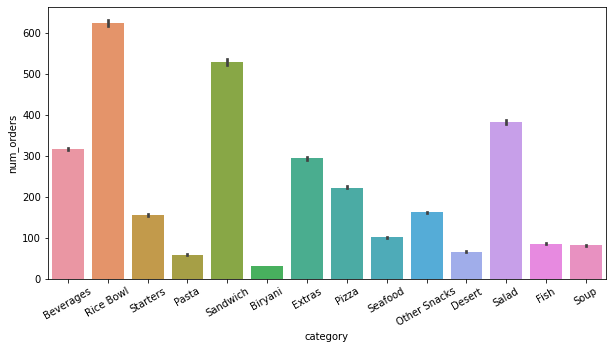

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df, x='category', y='num_orders')
plt.xticks(rotation=30)

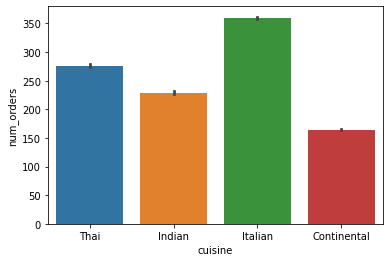

In [ ]:
sns.barplot(data=df, x='cuisine', y='num_orders')

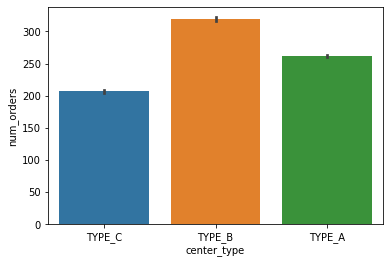

In [ ]:
sns.barplot(data=df, x='center_type', y='num_orders')

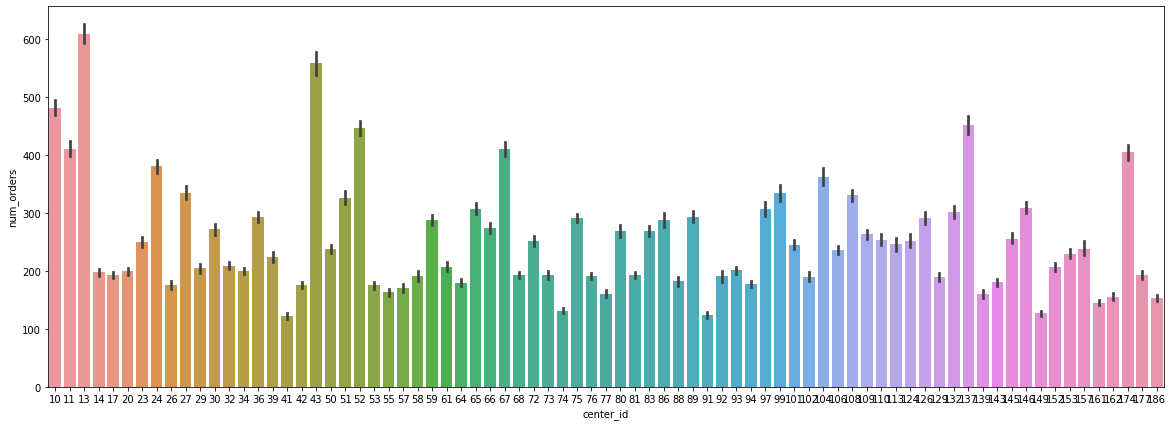

In [ ]:
fig,ax = plt.subplots(figsize=(20,7))
sns.barplot(data=df, x='center_id', y='num_orders')

In [ ]:
center_id_sortedby_numorders = df.groupby('center_id').describe()['num_orders']['mean'].sort_values(ascending=False).index
center_id_sortedby_numorders = list(center_id_sortedby_numorders)
df['center_id_sortedby_numorders'] = df['center_id']
df['center_id_sortedby_numorders'] = df['center_id_sortedby_numorders'].apply(lambda x: len(center_id_sortedby_numorders)-center_id_sortedby_numorders.index(x))

test_df['center_id_sortedby_numorders'] = test_df['center_id']
test_df['center_id_sortedby_numorders'] = test_df['center_id_sortedby_numorders'].apply(lambda x: len(center_id_sortedby_numorders)-center_id_sortedby_numorders.index(x))

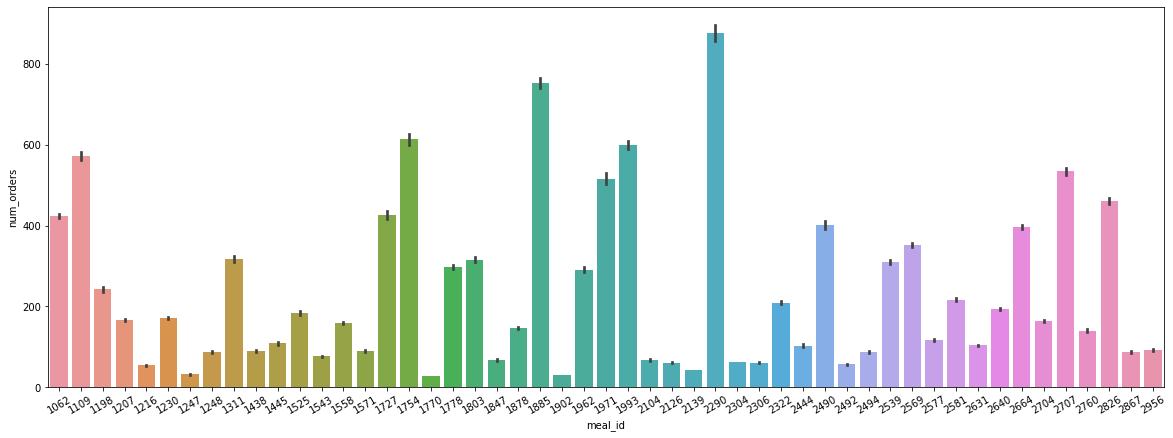

In [ ]:
fig,ax = plt.subplots(figsize=(20,7))
sns.barplot(data=df, x='meal_id', y='num_orders')
t = plt.xticks(rotation=90)

In [ ]:
meal_id_sortedby_numorders = df.groupby('meal_id').describe()['num_orders']['mean'].sort_values(ascending=False).index
meal_id_sortedby_numorders = list(meal_id_sortedby_numorders)
df['meal_id_sortedby_numorders'] = df['meal_id']
df['meal_id_sortedby_numorders'] = df['meal_id_sortedby_numorders'].apply(lambda x: len(meal_id_sortedby_numorders)-meal_id_sortedby_numorders.index(x))

test_df['meal_id_sortedby_numorders'] = test_df['meal_id']
test_df['meal_id_sortedby_numorders'] = test_df['meal_id_sortedby_numorders'].apply(lambda x: len(meal_id_sortedby_numorders)-meal_id_sortedby_numorders.index(x))

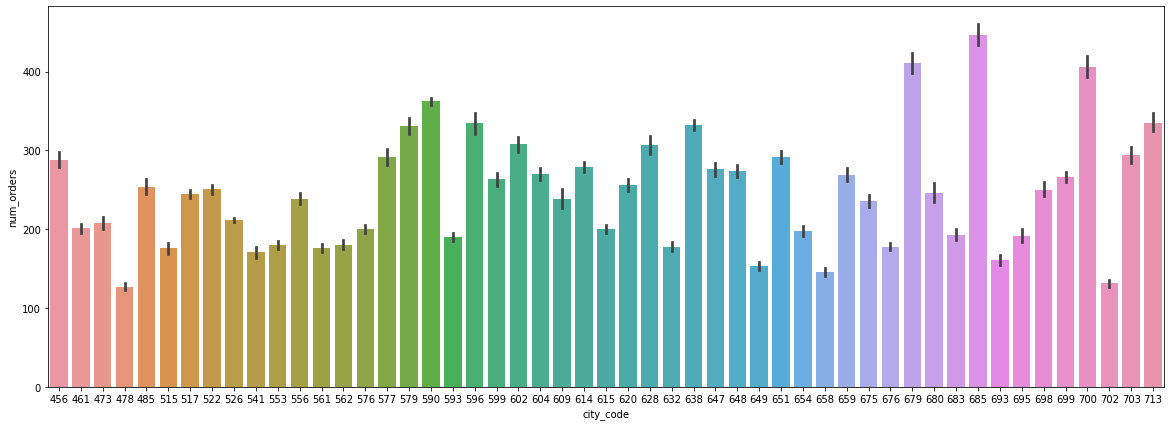

In [ ]:
fig,ax = plt.subplots(figsize=(20,7))
sns.barplot(data=df, x='city_code', y='num_orders')

In [ ]:
city_code_sortedby_numorders = df.groupby('city_code').describe()['num_orders']['mean'].sort_values(ascending=False).index
city_code_sortedby_numorders = list(city_code_sortedby_numorders)
df['city_code_sortedby_numorders'] = df['city_code']
df['city_code_sortedby_numorders'] = df['city_code_sortedby_numorders'].apply(lambda x: len(city_code_sortedby_numorders)-city_code_sortedby_numorders.index(x))

test_df['city_code_sortedby_numorders'] = test_df['city_code']
test_df['city_code_sortedby_numorders'] = test_df['city_code_sortedby_numorders'].apply(lambda x: len(city_code_sortedby_numorders)-city_code_sortedby_numorders.index(x))

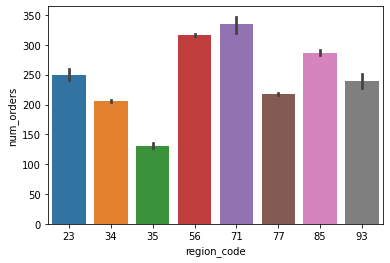

In [ ]:
sns.barplot(data=df, x='region_code', y='num_orders')

In [ ]:
region_code_sortedby_numorders = df.groupby('region_code').describe()['num_orders']['mean'].sort_values(ascending=False).index
region_code_sortedby_numorders = list(region_code_sortedby_numorders)
df['region_code_sortedby_numorders'] = df['region_code']
df['region_code_sortedby_numorders'] = df['region_code_sortedby_numorders'].apply(lambda x: len(region_code_sortedby_numorders)-region_code_sortedby_numorders.index(x))

test_df['region_code_sortedby_numorders'] = test_df['region_code']
test_df['region_code_sortedby_numorders'] = test_df['region_code_sortedby_numorders'].apply(lambda x: len(region_code_sortedby_numorders)-region_code_sortedby_numorders.index(x))

In [ ]:
# cat_pref = ['Rice Bowl', 'Sandwich', 'Salad', 'Beverages', 'Extras', 'Pizza', 'Other Snacks', 'Starters', 'Seafood', 'Fish', 'Soup', 'Desert', 'Pasta', 'Biryani']
# for cat in cat_pref:
#   df[df['category']==cat]['category'] = 14-cat_pref.index(cat)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [ ]:
cat_pref = ['Rice Bowl', 'Sandwich', 'Salad', 'Beverages', 'Extras', 'Pizza', 'Other Snacks', 'Starters', 'Seafood', 'Fish', 'Soup', 'Desert', 'Pasta', 'Biryani']
df.category = df['category'].apply(lambda x: 14-cat_pref.index(x))
test_df.category = test_df['category'].apply(lambda x: 14-cat_pref.index(x))

In [ ]:
df = pd.get_dummies(data=df, columns=['center_type', 'cuisine'])
test_df = pd.get_dummies(data=test_df, columns=['center_type', 'cuisine'])

In [ ]:
df['ratio_cp_bp'] = df.checkout_price/df.base_price
test_df['ratio_cp_bp'] = test_df.checkout_price/test_df.base_price

In [ ]:
df['diff_efp_hf'] = df['emailer_for_promotion'] - df['homepage_featured']
df['diff_cp_bp'] = df['checkout_price'] - df['base_price'] 

test_df['diff_efp_hf'] = test_df['emailer_for_promotion'] - test_df['homepage_featured']
test_df['diff_cp_bp'] = test_df['checkout_price'] - test_df['base_price']

In [ ]:
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'month',
       'year', 'city_code', 'region_code', 'op_area', 'category',
       'center_id_sortedby_numorders', 'meal_id_sortedby_numorders',
       'city_code_sortedby_numorders', 'region_code_sortedby_numorders',
       'center_type_TYPE_A', 'center_type_TYPE_B', 'center_type_TYPE_C',
       'cuisine_Continental', 'cuisine_Indian', 'cuisine_Italian',
       'cuisine_Thai', 'ratio_cp_bp', 'diff_efp_hf', 'diff_cp_bp'],
      dtype='object')

In [ ]:
features = ['checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'week' ,'month',
       'year', 'op_area', 'category',
       'center_id_sortedby_numorders', 'meal_id_sortedby_numorders',
       'city_code_sortedby_numorders','region_code_sortedby_numorders', 'center_type_TYPE_A',
       'center_type_TYPE_B', 'center_type_TYPE_C', 'cuisine_Continental',
       'cuisine_Indian', 'cuisine_Italian', 'cuisine_Thai', 'ratio_cp_bp', 'diff_efp_hf', 'diff_cp_bp', 'num_orders']

corr = df[features].corr()
features = features[:-1]
corr.sort_values(by='num_orders', ascending=False)['num_orders']

num_orders                        1.000000
meal_id_sortedby_numorders        0.488162
category                          0.395414
homepage_featured                 0.294490
emailer_for_promotion             0.277147
center_id_sortedby_numorders      0.228127
city_code_sortedby_numorders      0.177602
op_area                           0.176976
cuisine_Italian                   0.149443
region_code_sortedby_numorders    0.132011
center_type_TYPE_B                0.073322
cuisine_Thai                      0.021724
center_type_TYPE_A                0.001535
month                            -0.010001
year                             -0.014501
week                             -0.017210
cuisine_Indian                   -0.047453
diff_efp_hf                      -0.049820
center_type_TYPE_C               -0.073647
cuisine_Continental              -0.132514
diff_cp_bp                       -0.152950
ratio_cp_bp                      -0.205188
base_price                       -0.222306
checkout_pr

Let us remove all rows with num_orders greater than 10000 and store it in another variable called num_orders_lt_10000_df

In [ ]:
num_orders_lt_10000_df = df.drop(df[df.num_orders>10000].index, axis=0)

In [ ]:
from sklearn.metrics import mean_squared_log_error as msle

def get_e(model, df, target ):
  pred = model.predict(df)
  print(len(pred[pred<=0]))
  print(1000*msle(target, pred))

def preds_to_csv(m, preds):
  pd.DataFrame({'id':test_df.id, 'num_orders':preds}).to_csv('food-demand-forecast-'+m+'.csv', index=False)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor  as GBR

gbr = GBR()
gbr.fit(df[features], df.num_orders)
p = get_e(gbr, df[features], df.num_orders)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=300, max_depth=100,oob_score=True)
rfr.fit(num_orders_lt_10000_df[features], num_orders_lt_10000_df.num_orders)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
get_e(rfr, df[features], df.num_orders)
preds = rfr.predict(test_df[features])
preds_to_csv(m='rfr', preds=preds)

0
47.81133839704295


In [ ]:
from google.colab import files
files.download('food-demand-forecast-rfr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install reg_resampler

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import mean_squared_log_error,mean_squared_error
from reg_resampler import resampler
# from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# !pip install catboost

In [ ]:
# del train_df
# del meal_info_df
# del fulfilment_center_info_df
# del rfr
# del gbr
# del cbr
# del pred
# del preds
gc.collect()

168

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G         12G        176M        908K        525M        4.6G
Swap:            0B          0B          0B


In [ ]:
from catboost import CatBoostRegressor

cbr = CatBoostRegressor()
cbr.fit(df[features], df.num_orders)

Learning rate set to 0.116089
0:	learn: 377.0894663	total: 128ms	remaining: 2m 8s
1:	learn: 362.9550649	total: 232ms	remaining: 1m 55s
2:	learn: 351.5902535	total: 306ms	remaining: 1m 41s
3:	learn: 342.1448051	total: 378ms	remaining: 1m 34s
4:	learn: 334.3706348	total: 452ms	remaining: 1m 30s
5:	learn: 328.1055918	total: 522ms	remaining: 1m 26s
6:	learn: 322.2107557	total: 602ms	remaining: 1m 25s
7:	learn: 317.4555981	total: 679ms	remaining: 1m 24s
8:	learn: 313.6113177	total: 747ms	remaining: 1m 22s
9:	learn: 310.1820063	total: 815ms	remaining: 1m 20s
10:	learn: 307.4690509	total: 890ms	remaining: 1m 20s
11:	learn: 304.6928903	total: 959ms	remaining: 1m 18s
12:	learn: 302.6694853	total: 1.03s	remaining: 1m 18s
13:	learn: 300.9596808	total: 1.1s	remaining: 1m 17s
14:	learn: 298.6395631	total: 1.18s	remaining: 1m 17s
15:	learn: 296.5717940	total: 1.25s	remaining: 1m 16s
16:	learn: 295.2129177	total: 1.32s	remaining: 1m 16s
17:	learn: 293.8976974	total: 1.39s	remaining: 1m 16s
18:	learn:

In [ ]:
print("\nCBR:")
pred = cbr.predict(df[features].values)
print(len(pred[pred<=0]))
print(mse(df.num_orders, pred))
print(math.log(mse(df.num_orders, pred)))


CBR:
1933
44621.380609930784
10.705968409012344


In [ ]:
preds = cbr.predict(test_df[features])
print(len(preds[preds<=0]))
preds[preds<=0] = 20

1014


In [ ]:
# from keras.layers import Dense
# from keras.models import Sequential
# from keras.metrics import mean_squared_logarithmic_error as msle

# model = Sequential()
# model.add(Dense(512, activation='linear'))
# model.add(Dense(512, activation='linear'))
# model.add(Dense(1, activation='relu'))

# model.compile(optimizer='adam', loss='mean_squared_error', metrics=[msle])

In [ ]:
# model.fit(df[features].values, df.num_orders.values, epochs=10)

In [ ]:
pd.DataFrame({'id':test_df.id, 'num_orders':preds}).to_csv('demand-forecasting-sub.csv', index=False)

In [ ]:
from google.colab import files
files.download('demand-forecasting-sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>